In [126]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")

In [127]:
#Import file
df=pd.read_csv('./VPB.csv')

#Tiền xử lý dữ liệu
df=pd.DataFrame(df).dropna()
# df["Vol"] = df["Vol."].str.replace("M", "").astype(float) * 1e6
df["Vol_M"] = df["Vol."].str.replace("M", "").astype(float)
df = df.drop("Vol.",axis=1)
# Làm tròn giá
df["Price"] = df["Price"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Open"] = df["Open"].str.replace(",", "").astype(float).round(-1).astype(int)
df["High"] = df["High"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Low"] = df["Low"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Change"] = df["Change %"].str.replace("%", "").astype(float) / 100
df = df.drop('Change %', axis=1)
# Chuyển đổi cột Date sang định dạng datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
# Tính đường MA20 MA50
df = df.reindex(index=df.index[::-1])
df["MA20"] = df["Price"].rolling(window=20, min_periods=1).mean().round(-1).astype(int)  # Trung bình động 20 ngày
df["MA50"] = df["Price"].rolling(window=50,min_periods=1).mean().round(-1).astype(int)
df["VolMA20"] = df["Vol_M"].rolling(window=20,min_periods=1).mean().round(2)
df = df.reindex(index=df.index[::-1])

df.head(200)

,Date,Price,Open,High,Low,Vol_M,Change,MA20,MA50,VolMA20
1,2024-11-27,18950,19050,19200,17750,6.17,-0.0052,19280,19760,19.45
2,2024-11-26,19050,19050,19400,19050,33.38,0.0000,19340,19750,19.91
3,2024-11-25,19050,19050,19200,19050,8.11,0.0000,19400,19740,19.50
4,2024-11-22,19050,19200,19300,19050,18.06,-0.0078,19460,19730,19.66
5,2024-11-21,19200,18700,19200,18600,28.30,0.0267,19510,19720,19.66
...,...,...,...,...,...,...,...,...,...,...
197,2024-02-19,18800,18850,18940,18660,11.05,-0.0025,18560,18270,10.67
198,2024-02-16,18850,18940,18940,18710,7.32,0.0025,18540,18260,10.69
199,2024-02-15,18800,18610,19130,18610,19.36,0.0102,18530,18240,11.57
200,2024-02-07,18610,18370,18610,18330,10.72,0.0155,18520,18230,11.50


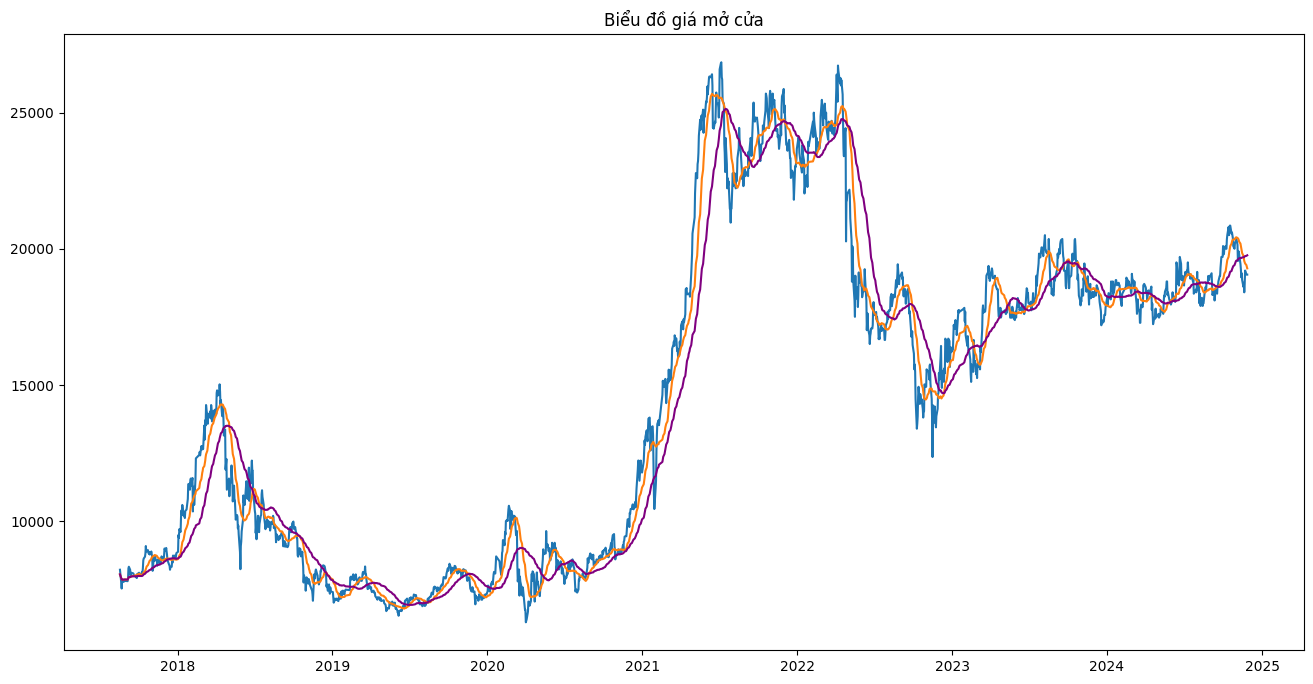

In [128]:

plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá mở cửa')
# plt.plot(df['Price'])
plt.plot(df["Date"], df["Open"])
plt.plot(df["Date"],df["MA20"], label = "MA20")
plt.plot(df["Date"],df["MA50"],color = "purple", label = "MA50")
plt.show()

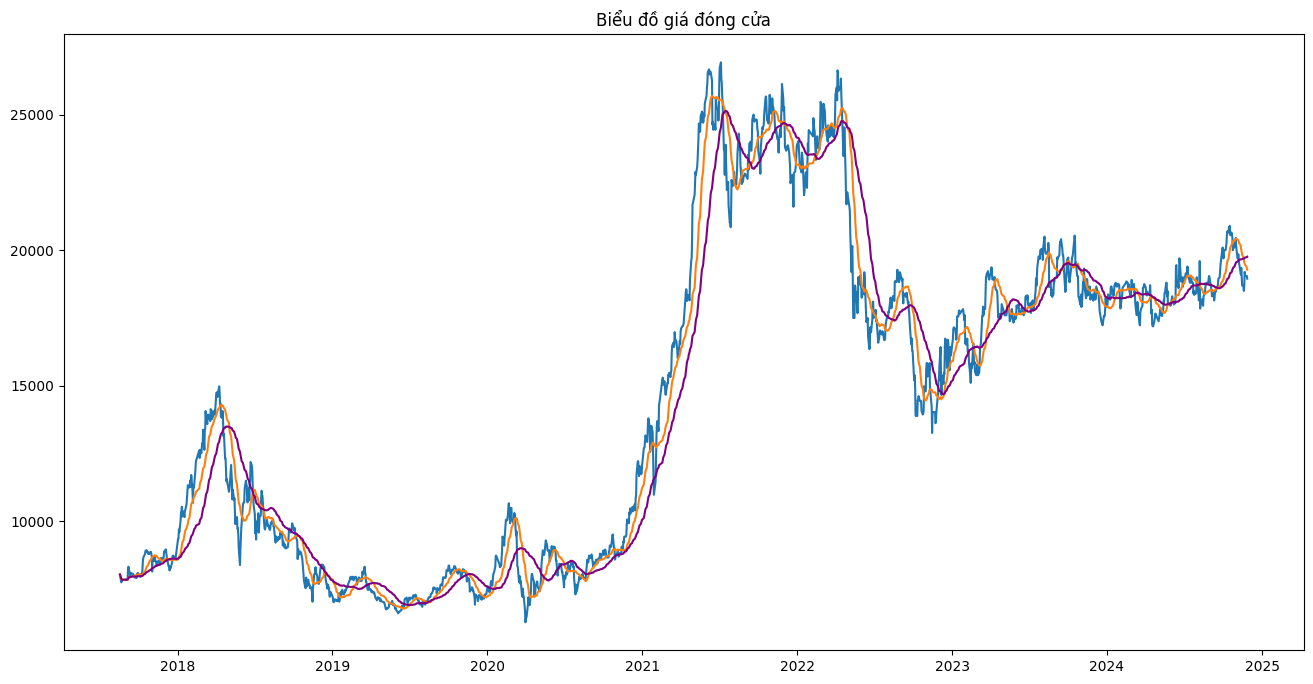

In [129]:
plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa')
# plt.plot(df['Price'])
plt.plot(df["Date"], df["Price"], label="Price")
plt.plot(df["Date"],df["MA20"], label = "MA20")
plt.plot(df["Date"],df["MA50"],color = "purple", label = "MA50")
plt.show()

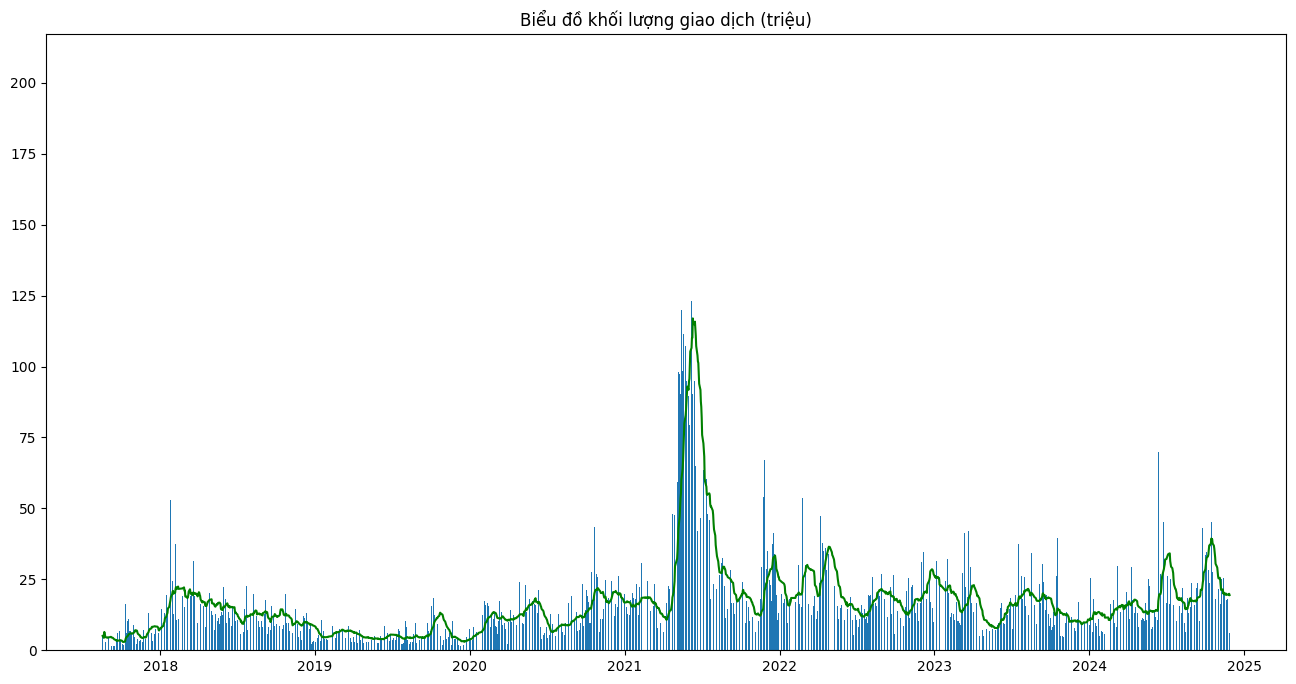

In [130]:
plt.figure(figsize=(16,8))
plt.title('Biểu đồ khối lượng giao dịch (triệu)')
# plt.plot(df['Price'])
plt.bar(df["Date"], df["Vol_M"], label="Vol")
plt.plot(df["Date"],df["VolMA20"],color = "green", label = "VolMA20")
plt.show()

## MACHINE LEARNING RANDOM FOREST REGRESSOR

Hai hàm mean_absolute_error (MAE) và mean_squared_error (RMSE) được sử dụng để đánh giá độ chính xác của mô hình học máy

In [131]:
# Đặc trưng đầu vào (X) và mục tiêu (y)
X = df[["Vol_M","Open","High","Low","MA20","MA50","VolMA20","Change"]]
y = df["Price"]

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 97.53739692667251
Root Mean Squared Error (RMSE): 140.32704696073307


Đánh giá kết quả dựa trên MAE và RMSE:
Mean Absolute Error (MAE): 97.537

MAE cho biết trung bình khoảng cách tuyệt đối giữa giá trị thực và giá trị dự đoán.
Với giá cổ phiếu, giá trị MAE ~97 cho thấy sai số trung bình khá nhỏ, đặc biệt nếu giá cổ phiếu dao động trong khoảng hàng chục nghìn (ví dụ, 20,000 đến 30,000).
Kết quả này là dấu hiệu tích cực, mô hình dự đoán khá ổn định.
Root Mean Squared Error (RMSE): 140.327

RMSE phóng đại các sai số lớn hơn do sử dụng bình phương của khoảng cách, giúp đánh giá độ ổn định của mô hình.
RMSE ~140 là một kết quả khá hợp lý, nhưng nếu so với MAE, giá trị RMSE cao hơn cho thấy mô hình có thể mắc một số lỗi lớn trong dự đoán ở các trường hợp cụ thể.

## đánh giá mô hình trong x ngày gần nhất

Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác


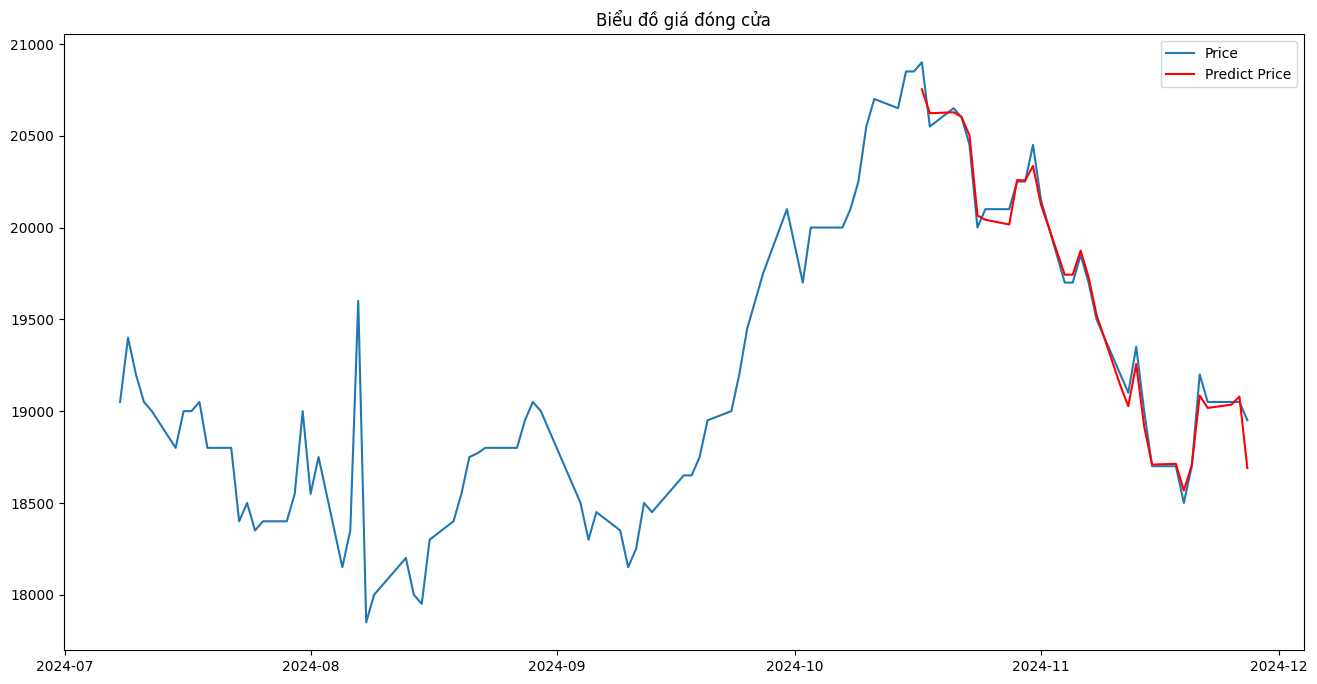

In [132]:
#Số ngày gần nhất
num_days = 30

data_test =  df[["Vol_M","Open","High","Low","MA20","MA50","VolMA20","Change"]].head(num_days)
predicted_rfr = model.predict(data_test)

print("Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác")
plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa')
# plt.plot(df['Price'])
df_predict = df.head(100)
plt.plot(df_predict["Date"], df_predict["Price"], label="Price")
plt.plot(df_predict["Date"].head(num_days), predicted_rfr,color ="red", label="Predict Price")
plt.legend() 
plt.show()


##SỬ DỤNG MÔ HÌNH HỌC MÁY XGBOOST

In [133]:
import xgboost as xgb

# Khởi tạo và huấn luyện mô hình XGBoost
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 91.04606477506869
Root Mean Squared Error (RMSE): 124.53121906310481


## ĐÁNHG GIÁ MÔ HÌNH TRONG X NGÀY GẦN NHẤT

Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác


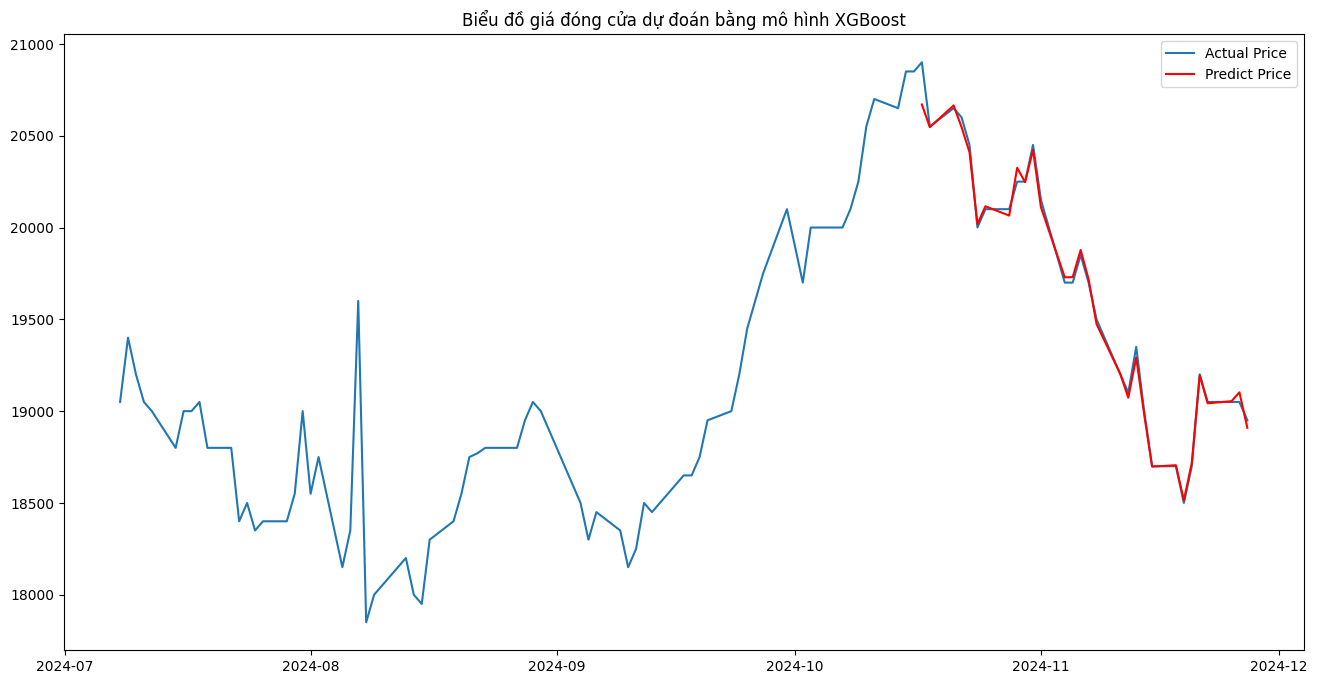

In [134]:

data_test =  df[["Vol_M","Open","High","Low","MA20","MA50","VolMA20","Change"]].head(num_days)
predicted_xgb = model.predict(data_test)

print("Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác")
plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa dự đoán bằng mô hình XGBoost')
# plt.plot(df['Price'])
df_predict = df.head(100)
plt.plot(df_predict["Date"], df_predict["Price"], label='Actual Price')
plt.plot(df_predict["Date"].head(num_days), predicted_xgb,color ="red", label="Predict Price")
plt.legend() 
plt.show()


## SỬ DỤNG MÔ HÌNH HỌC MÁY LIGHT GBM

In [135]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Giả sử dữ liệu của bạn trong df
X_lgb = df[["Vol_M","Open","High","Low","MA20","MA50","VolMA20","Change"]]
y_lgb = df["Price"]

# 1. Tiền xử lý dữ liệu: chuẩn hóa và chia tập huấn luyện và kiểm tra
scaler = StandardScaler()

# Chuẩn hóa X
X_scaled_lgb = scaler.fit_transform(X_lgb)

# Chia tập huấn luyện và kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_scaled_lgb, y_lgb, test_size=0.2,random_state=42)
# 2. Khởi tạo mô hình LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression', metric='rmse', num_leaves=20, learning_rate=0.05, n_estimators=200)

# 3. Huấn luyện mô hình
model_lgb.fit(X_train_lgb, y_train_lgb)

# 4. Dự đoán trên tập kiểm tra
y_pred_lgb = model_lgb.predict(X_test_lgb)

# 5. Đánh giá mô hình bằng các chỉ số RMSE và MAE
rmse = np.sqrt(mean_squared_error(y_test_lgb, y_pred_lgb))
mae = mean_absolute_error(y_test_lgb, y_pred_lgb)

# In kết quả
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 1454, number of used features: 8
[LightGBM] [Info] Start training from score 14499.711142
Root Mean Squared Error (RMSE): 122.78143708258598
Mean Absolute Error (MAE): 87.06603633249692


Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác


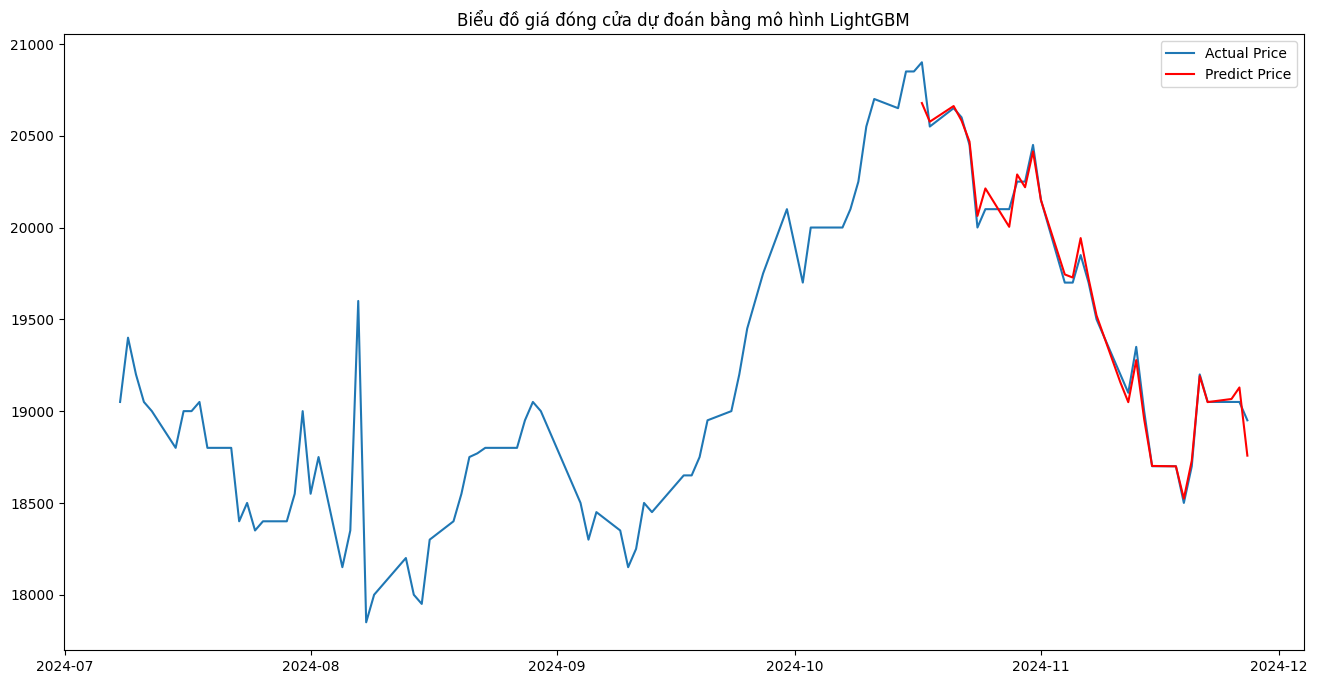

In [136]:
#Vẽ biểu đồ
data_test =  df[["Vol_M","Open","High","Low","MA20","MA50","VolMA20","Change"]].head(num_days)
X_scaled_test_lgb = scaler.transform(data_test)
predicted_lbg = model_lgb.predict(X_scaled_test_lgb)

print("Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác")
plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa dự đoán bằng mô hình LightGBM')
# plt.plot(df['Price'])
df_predict = df.head(100)
plt.plot(df_predict["Date"], df_predict["Price"], label='Actual Price')
plt.plot(df_predict["Date"].head(num_days), predicted_lbg,color ="red", label="Predict Price")
plt.legend() 
plt.show()

## TỔNG HỢP BIỂU ĐỒ SO SÁNH CỦA 3 ML : RANDOM FOREST REGRESSOR , XGBOOST, LIGHT GBM

Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác


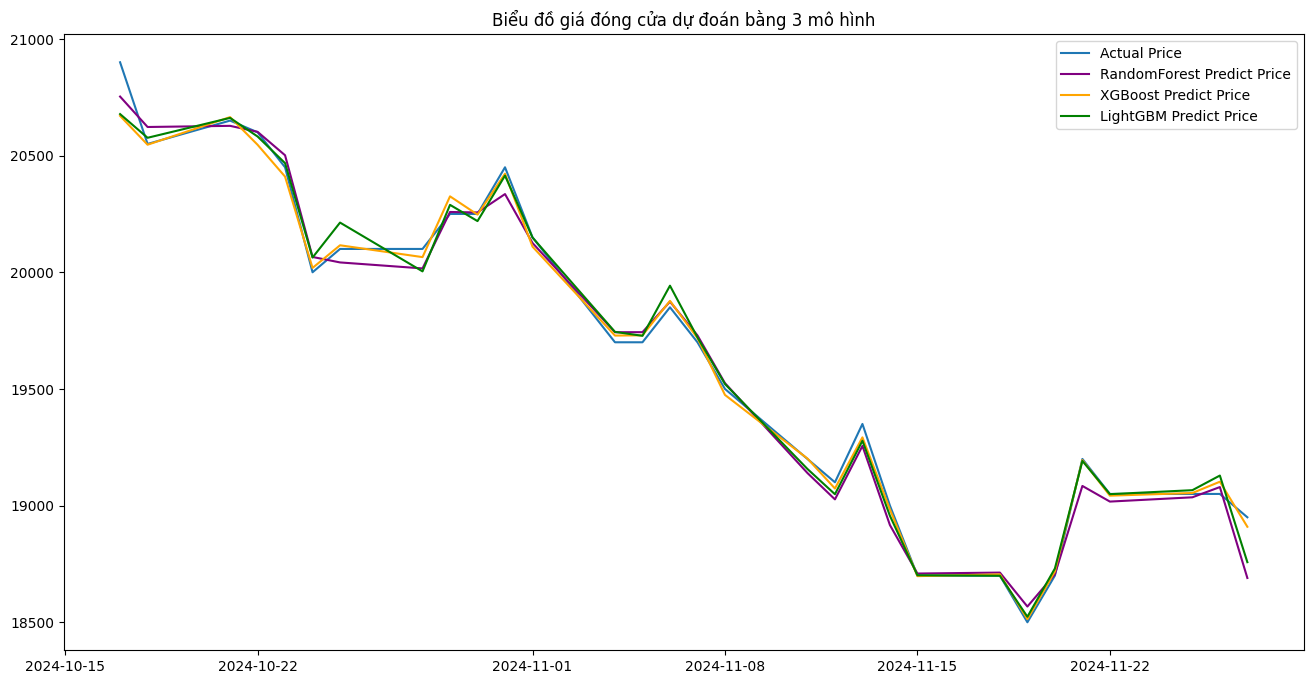

In [137]:
print("Đường đỏ là đường dự đoán giá, Đường màu lam là đường giá chính xác")
df_predict = df.head(30)
plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa dự đoán bằng 3 mô hình')
# plt.plot(df['Price'])
plt.plot(df_predict["Date"], df_predict["Price"], label='Actual Price')
plt.plot(df_predict["Date"].head(num_days), predicted_rfr,color ="purple", label="RandomForest Predict Price")
plt.plot(df_predict["Date"].head(num_days), predicted_xgb,color ="orange", label="XGBoost Predict Price")
plt.plot(df_predict["Date"].head(num_days), predicted_lbg,color ="green", label="LightGBM Predict Price")
plt.legend() 
plt.show()

## Dự đoán giá cổ phiếu trong x ngày tới với các dữ liệu được giả lập random

In [138]:

# predictions = []
# dates = []  # Danh sách ngày dự đoán
# features = []  # Danh sách các đặc trưng dự đoán
# last_day_data = X.head(1)  # Dữ liệu của ngày cuối cùng (2024-11-27)
# last_date = df['Date'].iloc[0]  # Ngày cuối cùng từ dữ liệu
# #Số ngày dự đoán
# predict_day = 10



# for i in range(predict_day):
#     # Dự đoán giá cho ngày tiếp theo
#     predicted_price = model.predict(last_day_data)  # Dự đoán cho dòng cuối cùng
#     predictions.append(predicted_price[0])

#     # Tạo ngày tiếp theo
#     next_date = last_date + pd.Timedelta(days=i+1)  # Ngày tiếp theo
#     dates.append(next_date)

#     # Lưu trữ các đặc trưng của ngày dự đoán
#     features.append(last_day_data.iloc[0].to_dict())

#     # Cập nhật dữ liệu cho ngày tiếp theo
#     next_day_data = last_day_data.copy()

#     # Giả sử "Open", "High", "Low", "MA20", "MA50", "VolMA20" có sự thay đổi nhẹ từ ngày trước đó
#     next_day_data["Open"] += np.random.uniform(-1000, 1000)
#     next_day_data["Vol_M"] += np.random.uniform(-0.5, 5)
#     next_day_data["High"] += np.random.uniform(-1000, 1000)
#     next_day_data["Low"] += np.random.uniform(-1000, 1000)
#     next_day_data["MA20"] += np.random.uniform(-20, 20)
#     next_day_data["MA50"] += np.random.uniform(-20, 20)
#     next_day_data["VolMA20"] += np.random.uniform(-1, 1)
#     next_day_data["Change"] = np.random.uniform(-7, 7)  # Thay đổi nhẹ mỗi ngày

#     # Cập nhật lại đặc trưng X
#     last_day_data = next_day_data

# # Tạo DataFrame kết quả với các ngày, đặc trưng và giá dự đoán
# result_df = pd.DataFrame(features)
# result_df["Date"] = dates
# result_df["Predicted_Price"] = predictions

# # In kết quả
# plt.figure(figsize=(16,8))
# plt.title('Biểu đồ giá đóng cửa')
# # plt.plot(df['Price'])
# df_predict = df.head(100)
# plt.plot(df_predict["Date"], df_predict["Price"], label="Price")
# plt.plot(result_df["Date"], result_df["Predicted_Price"],color ="green", label="Price")
# plt.show()